In [0]:
import os
import numpy as np
import torch
import time
import pickle
import matplotlib.pyplot as plt
from collections import OrderedDict
from torch.autograd import Variable
from pathlib import Path
%matplotlib inline

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [6]:
%cd drive/My\ Drive/do-as-i-do/

/content/drive/My Drive/do-as-i-do


In [7]:
%pwd

'/content/drive/My Drive/do-as-i-do'

In [8]:
!pip install tensorflow==1.15 scipy==1.0 dominate

     |████████████████████████████████| 412.3MB 39kB/s 
     |████████████████████████████████| 50.0MB 65kB/s 
     |████████████████████████████████| 3.8MB 44.2MB/s 
     |████████████████████████████████| 512kB 49.7MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=74f80c1f4a3a600fab311dedef4c1525bcaa189bd2257c7673a554bb7c37c9a4
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: seaborn 0.10.0 has requirement scipy>=1.0.1, but you'll have scipy 1.0.0 which is incompatible.
ERROR: plotnine 0.6.0 has requirement scipy>=1.2.0, but you'll have scipy 1.0.0 which is incompatible.
ERROR: cvxpy 1.0.31 has requirement scipy>=1.1.0, but you'll have scipy 1.0.0 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: tensorboard 2.2.0
    Uninstalling tensorbo

In [0]:
import config.train_opt as opt

In [0]:
pix2pixhd_dir = Path('./src/pix2pixHD/')

import sys
sys.path.append(str(pix2pixhd_dir))
%load_ext autoreload
%autoreload 2

Import local functions from pix2pix

In [0]:
from data.data_loader import CreateDataLoader
from models.models import create_model
import util.util as util
from util.visualizer import Visualizer

In [0]:
iter_path = os.path.join(opt.checkpoints_dir, opt.name, 'iter.txt')

In [14]:
data_loader = CreateDataLoader(opt)
dataset = data_loader.load_data()
dataset_size = len(data_loader)
print('Training images = ', dataset_size)
    
start_epoch, epoch_iter = 1, 0
total_steps = (start_epoch-1) * dataset_size + epoch_iter
display_delta = total_steps % opt.display_freq
print_delta = total_steps % opt.print_freq
save_delta = total_steps % opt.save_latest_freq

CustomDatasetDataLoader
dataset [AlignedDataset] was created
Training images =  240


# Visualize Poses and corresponding Images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

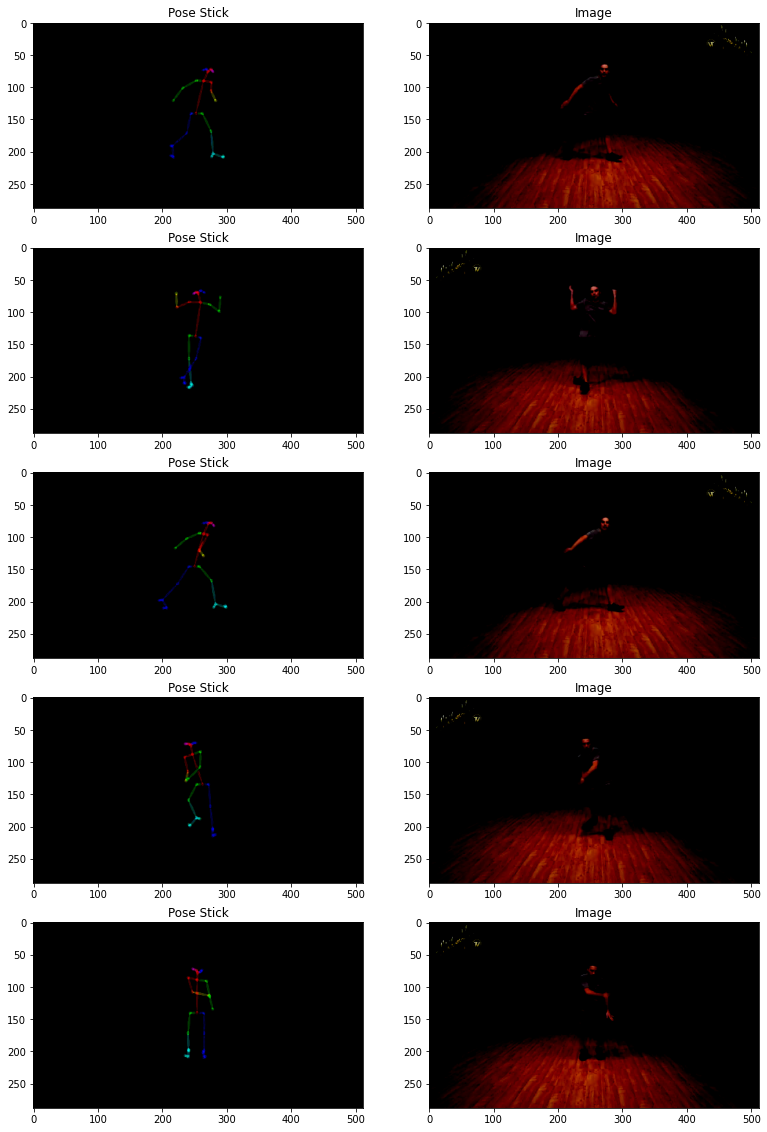

In [15]:
plt.figure(figsize = [13,20])
for i, img in enumerate(dataset):
    #Pose
    plt.subplot(5,2,i*2+1)
    plt.title("Pose Stick")
    plt.imshow(img['label'][0].permute(1,2,0))
    #Image
    plt.subplot(5,2,(i+1)*2)
    plt.title("Image")
    plt.imshow(img['image'][0].permute(1,2,0))

    if i==4:
        break
plt.show()

In [16]:
model = create_model(opt)
visualizer = Visualizer(opt)

GlobalGenerator(
  (model): Sequential(
    (0): ReflectionPad2d((3, 3, 3, 3))
    (1): Conv2d(3, 64, kernel_size=(7, 7), stride=(1, 1))
    (2): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (3): ReLU(inplace=True)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (5): InstanceNorm2d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (8): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 512, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (11): InstanceNorm2d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (12): ReLU(inplace=True)
    (13): Conv2d(512, 1024, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (14): InstanceNorm2d(1024, eps=1e-05, momentum=0.1, affi

Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/checkpoints/vgg19-dcbb9e9d.pth



create web directory ./checkpoints/Pose_Game/web...


In [18]:
!pip install datetime

     |████████████████████████████████| 61kB 9.0MB/s 
     |████████████████████████████████| 235kB 41.1MB/s 


In [22]:
import datetime
start_time = datetime.datetime.now()

for epoch in range(start_epoch, opt.niter + opt.niter_decay + 1):
    epoch_start_time = time.time()
    if epoch != start_epoch:
        epoch_iter = epoch_iter % dataset_size
    for i, data in enumerate(dataset, start=epoch_iter):
        iter_start_time = time.time()
        total_steps += opt.batchSize
        epoch_iter += opt.batchSize

        # collect output images
        save_fake = total_steps % opt.display_freq == display_delta
        
        # Forward Pass
        losses, generated = model(Variable(data['label']), Variable(data['inst']), 
            Variable(data['image']), Variable(data['feat']), infer=save_fake)
        
        # sum per device losses
        losses = [ torch.mean(x) if not isinstance(x, int) else x for x in losses ]
        loss_dict = dict(zip(model.module.loss_names, losses))

        # calculate final loss 
        loss_D = (loss_dict['D_fake'] + loss_dict['D_real']) * 0.5
        loss_G = loss_dict['G_GAN'] + loss_dict.get('G_GAN_Feat',0) + loss_dict.get('G_VGG',0)
        
        # Backward Pass
        # update Generator weights
        model.module.optimizer_G.zero_grad()
        loss_G.backward()
        model.module.optimizer_G.step()

        # update Discriminator weights
        model.module.optimizer_D.zero_grad()
        loss_D.backward()
        model.module.optimizer_D.step()
  
        # Display results and errors 
        # print out errors
        if total_steps % opt.print_freq == print_delta:
            errors = {k: v.item() if not isinstance(v, int) else v for k, v in loss_dict.items()}
            t = (time.time() - iter_start_time) / opt.batchSize
            visualizer.print_current_errors(epoch, epoch_iter, errors, t)
            visualizer.plot_current_errors(errors, total_steps)

        # Display output images
        if save_fake:
            visuals = OrderedDict([('input_label', util.tensor2label(data['label'][0], opt.label_nc)),
                                   ('synthesized_image', util.tensor2im(generated.data[0])),
                                   ('real_image', util.tensor2im(data['image'][0]))])
            visualizer.display_current_results(visuals, epoch, total_steps)

        # Save latest model
        if total_steps % opt.save_latest_freq == save_delta:
            print('saving the latest model (epoch %d, total_steps %d)' % (epoch, total_steps))
            model.module.save('latest')            
            np.savetxt(iter_path, (epoch, epoch_iter), delimiter=',', fmt='%d')

        if epoch_iter >= dataset_size:
            break
       
    # end of epoch 
    iter_end_time = time.time()
    print('End of epoch %d / %d \t Time Taken: %d sec' %
          (epoch, opt.niter + opt.niter_decay, time.time() - epoch_start_time))

    # Save model for this epoch
    if epoch % opt.save_epoch_freq == 0:
        print('saving the model at the end of epoch %d, iters %d' % (epoch, total_steps))        
        model.module.save('latest')
        model.module.save(epoch)
        np.savetxt(iter_path, (epoch+1, 0), delimiter=',', fmt='%d')

    # Train the entire network after certain iterations
    if (opt.niter_fix_global != 0) and (epoch == opt.niter_fix_global):
        model.module.update_fixed_params()

    # Linearly decay learning rate after certain iterations
    if epoch > opt.niter:
        model.module.update_learning_rate()
        
torch.cuda.empty_cache()

print(end='\n\n')
print('Total time elapsed = ', datetime.datetime.now() - start_time)

End of epoch 1 / 40 	 Time Taken: 221 sec
End of epoch 2 / 40 	 Time Taken: 109 sec
(epoch: 3, iters: 160, time: 0.581) G_GAN: 0.516 G_GAN_Feat: 2.504 G_VGG: 3.231 D_real: 0.218 D_fake: 0.554 

saving the latest model (epoch 3, total_steps 640)
End of epoch 3 / 40 	 Time Taken: 113 sec
End of epoch 4 / 40 	 Time Taken: 109 sec
End of epoch 5 / 40 	 Time Taken: 109 sec
saving the model at the end of epoch 5, iters 1200
(epoch: 6, iters: 80, time: 0.590) G_GAN: 0.458 G_GAN_Feat: 2.455 G_VGG: 2.191 D_real: 0.322 D_fake: 0.633 
saving the latest model (epoch 6, total_steps 1280)
End of epoch 6 / 40 	 Time Taken: 114 sec
End of epoch 7 / 40 	 Time Taken: 109 sec
(epoch: 8, iters: 240, time: 0.583) G_GAN: 0.996 G_GAN_Feat: 1.838 G_VGG: 1.555 D_real: 0.771 D_fake: 0.308 
saving the latest model (epoch 8, total_steps 1920)
End of epoch 8 / 40 	 Time Taken: 113 sec
End of epoch 9 / 40 	 Time Taken: 109 sec
End of epoch 10 / 40 	 Time Taken: 109 sec
saving the model at the end of epoch 10, iters

# Train loss

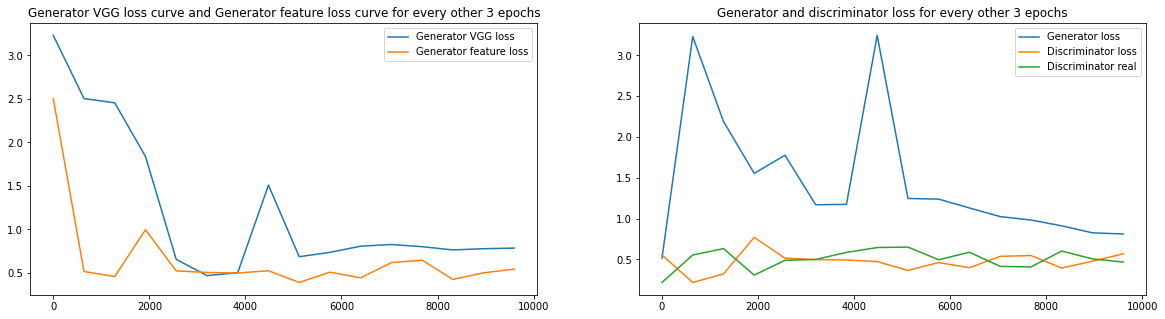

In [26]:
#Initial error G_GAN_Feat: 2.504 D_real: 0.218 G_GAN: 0.516 G_VGG: 3.231 D_fake: 0.554
G_gan_feat = [2.504]
G_gan = [0.516]
D_fake = [0.554]
D_real = [0.218]
G_vgg = [3.231]
iters = [0]
with open("./checkpoints/Pose_Game/loss_log.txt") as f:
    line = f.readline()
    i = 1
    while line:
        if "G_GAN_Feat:" in line.split():
            A = line.split()
            G_gan_feat.append(float(A[7]))
            G_vgg.append(float(A[9]))
            G_gan.append(float(A[11]))
            D_fake.append(float(A[13]))
            D_real.append(float(A[15]))
            iters.append(dataset_size*(int(A[1][:-1])-1) + int(A[3][:-1])) 
        line = f.readline()
        i += 1
plt.figure(figsize = [20,5])
plt.subplot(1,2,1)
plt.title("Generator VGG loss curve and Generator feature loss curve for every other 3 epochs")
plt.plot(iters,G_vgg)
plt.plot(iters,G_gan_feat)
plt.legend(["Generator VGG loss","Generator feature loss"])
plt.subplot(1,2,2)
plt.title("Generator and discriminator loss for every other 3 epochs")
plt.plot(iters,G_gan)
plt.plot(iters,D_fake)
plt.plot(iters,D_real)
plt.legend(["Generator loss","Discriminator loss","Discriminator real"])